In [1]:
#Lander Borbe

#importing libraries and .csv file

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



titanic_data = pd.read_csv('test.csv')

In [2]:
titanic_data.shape

(891, 12)

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [6]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


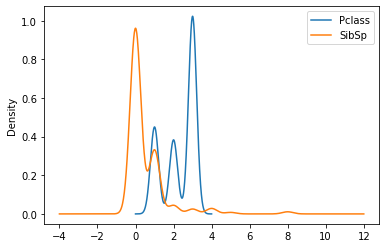

In [7]:
titanic_data.plot(x="Survived", y=["Pclass", "SibSp"], kind="density")
plt.show()

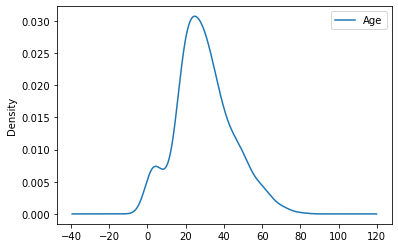

In [8]:
titanic_data.plot(x="Survived", y=["Age"], kind="density")
plt.show()

In [9]:
#Check for na data

titanic_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#Cleaning the data
#Dropping Columns with String Values except Sex

titanic_data = titanic_data.drop(columns=['Name','Ticket','Cabin'])
titanic_data.shape

(891, 9)

In [11]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [12]:
#Filling NaN values in Age by mean.
#Dropping NaN values in Embarked

titanic_data = titanic_data.dropna(subset=['Embarked'])
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [13]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [14]:
#Changing Sex(string) values to male=1 & female=0

Sex2 = pd.get_dummies(titanic_data['Sex'])
titanic_data2=pd.concat((titanic_data, Sex2), axis=1)
titanic_data2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,1


In [15]:
#Dropping Sex and female columns

titanic_data3=titanic_data2.drop(columns=['Sex', 'female'])
titanic_data3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1


In [16]:
#Renaming male column to Sex

titanic_data4 = titanic_data3.rename(columns={"male":"Sex"})
titanic_data4.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1


In [17]:
#Changing values C = 0 , S = 1, and Q = 2

titanic_data4['Embarked'].unique()
embarked = {'C': 0, 'S': 1,'Q':2}
titanic_data4['Embarked'].replace(embarked, inplace=True)
titanic_data4.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.0,1,0,7.2500,1,1
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,1,1


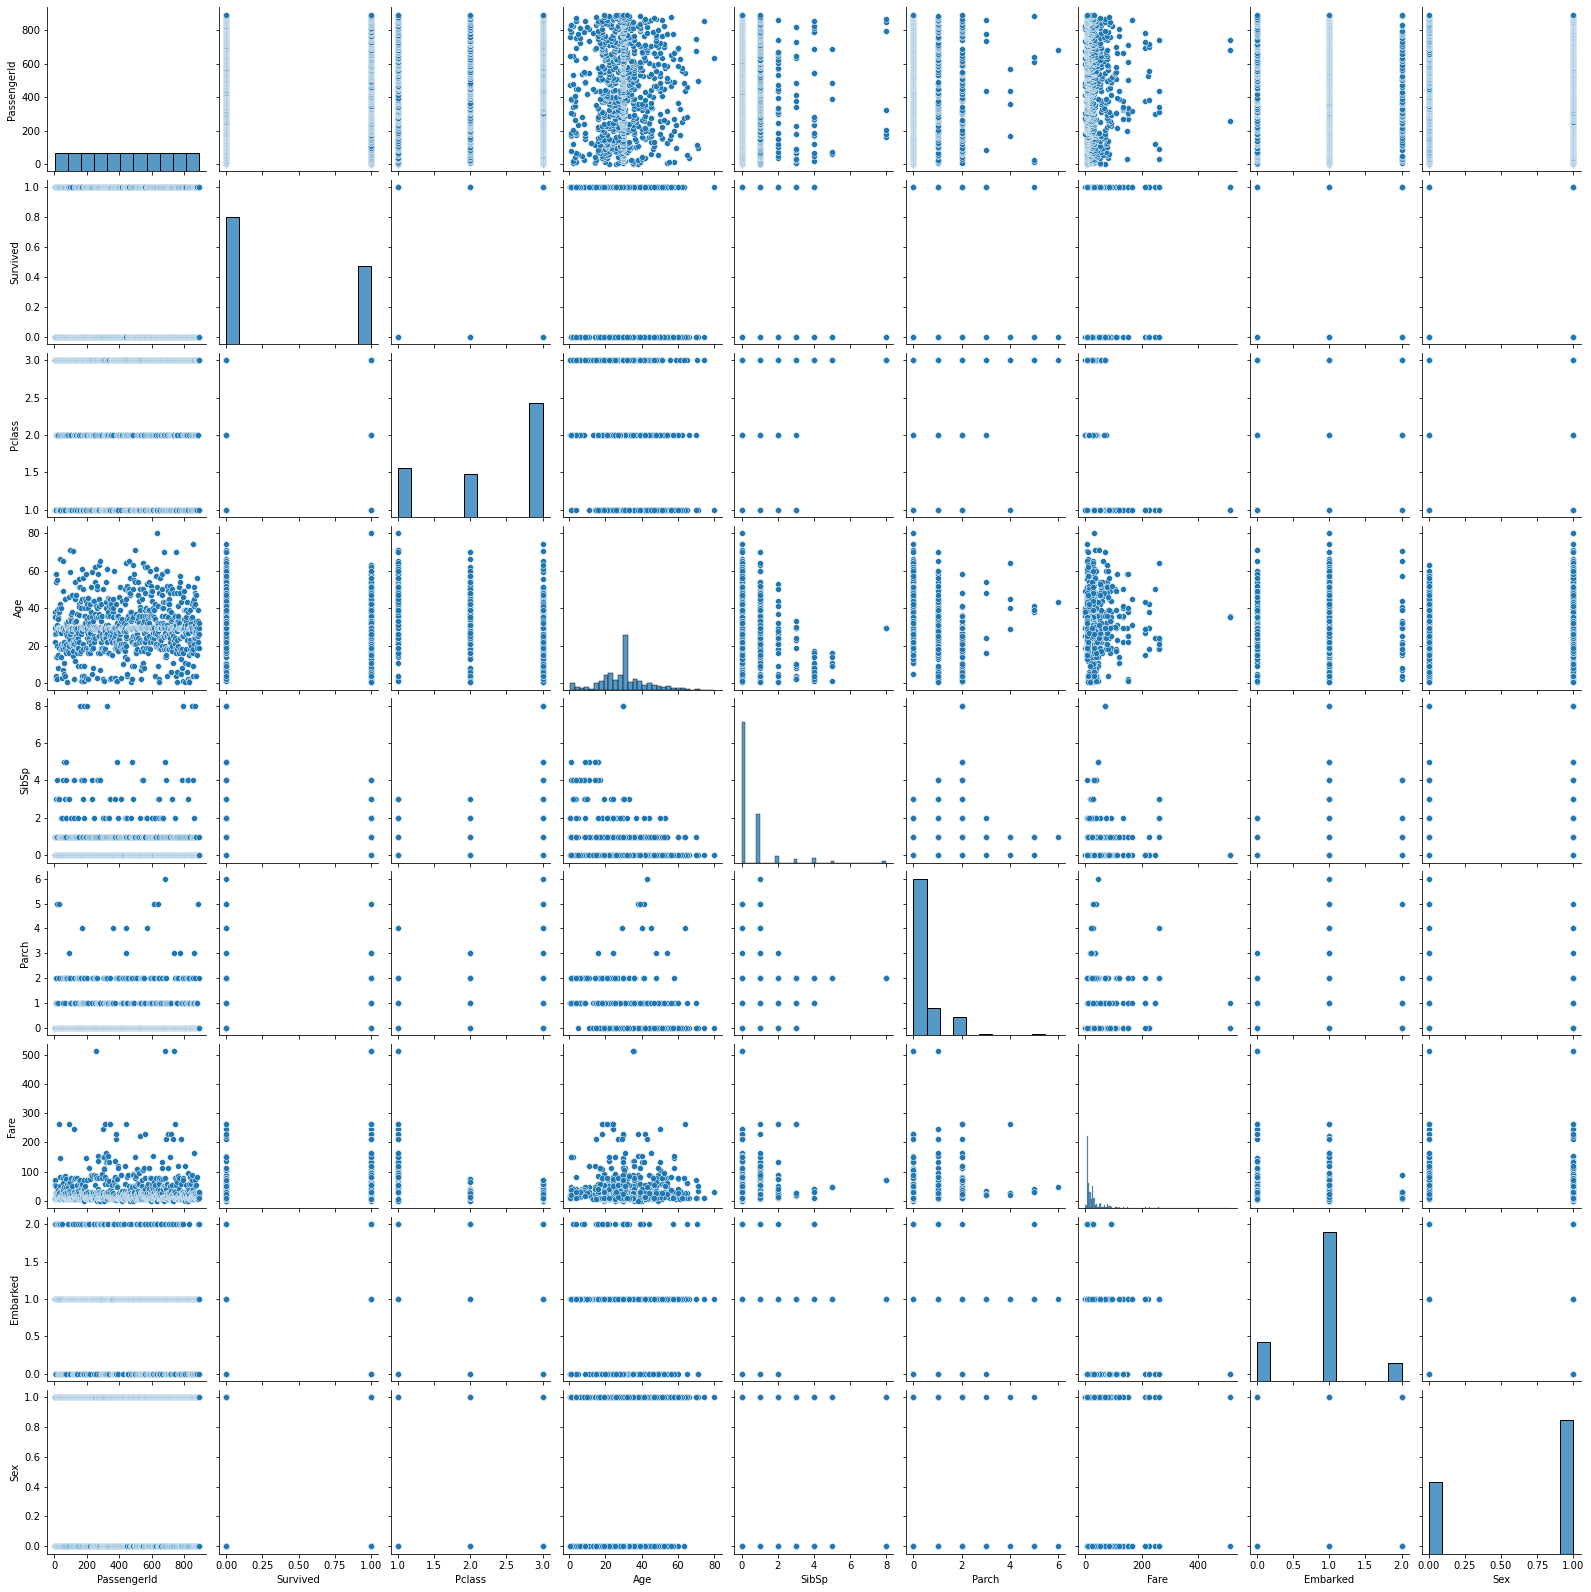

In [18]:
sns.pairplot(titanic_data4)

In [19]:
#Prepairing data for training

X = titanic_data4.drop(columns=['Survived'])
y = titanic_data4['Survived']

In [20]:
#Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
#For Predictions

pred=model.predict(X_test)
print(pred)

[0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0
 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0
 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0]


In [22]:
#Accuracy Score

AccScore = accuracy_score(y_test, pred)
FinAccScore = AccScore * 100
print("The Accuracy score is: " + str(FinAccScore))

The Accuracy score is: 74.15730337078652
